In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Sklearn models and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


In [6]:
df = pd.read_csv("data\INX_Future_Inc_Employee_Performance.csv")

In [7]:
target = 'PerformanceRating'
X = df.drop(columns=[target])
y = df[target]

In [8]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [9]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

In [10]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

In [12]:
X_transformed = preprocessor.fit_transform(X)
X_transformed


array([[-0.54145787,  0.10206085,  0.10300049, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.10988772,  0.59146353,  1.06114456, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.33925978, -0.5096925 ,  1.06114456, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.44015684,  2.30437292, -1.81328765, ...,  1.        ,
         1.        ,  0.        ],
       [-0.32127846, -0.02028982,  0.10300049, ...,  1.        ,
         0.        ,  0.        ],
       [-1.42217552, -0.75439384, -0.85514358, ...,  1.        ,
         0.        ,  1.        ]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


In [14]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2


In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGB Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mae, rmse, r2 = evaluate_model(y_test, y_pred)

    print(f"{name}:\n  MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2 Score: {r2:.4f}\n{'-'*40}")
    results.append((name, r2))

# Show all R2 scores
model_scores = pd.DataFrame(results, columns=["Model", "R2_Score"]).sort_values(by="R2_Score", ascending=False)
print(model_scores)


Linear Regression:
  MAE: 0.3319, RMSE: 0.4176, R2 Score: 0.2524
----------------------------------------
Lasso:
  MAE: 0.2807, RMSE: 0.4860, R2 Score: -0.0126
----------------------------------------
Ridge:
  MAE: 0.3313, RMSE: 0.4171, R2 Score: 0.2542
----------------------------------------
K-Neighbors Regressor:
  MAE: 0.2667, RMSE: 0.4091, R2 Score: 0.2826
----------------------------------------
Decision Tree:
  MAE: 0.1125, RMSE: 0.3354, R2 Score: 0.5177
----------------------------------------
Random Forest:
  MAE: 0.1134, RMSE: 0.2510, R2 Score: 0.7298
----------------------------------------
XGB Regressor:
  MAE: 0.1262, RMSE: 0.2617, R2 Score: 0.7065
----------------------------------------
CatBoost Regressor:
  MAE: 0.1276, RMSE: 0.2332, R2 Score: 0.7669
----------------------------------------
AdaBoost Regressor:
  MAE: 0.3361, RMSE: 0.3696, R2 Score: 0.4145
----------------------------------------
                   Model  R2_Score
7     CatBoost Regressor  0.766902
5    


CatBoost R2 Score: 76.71%


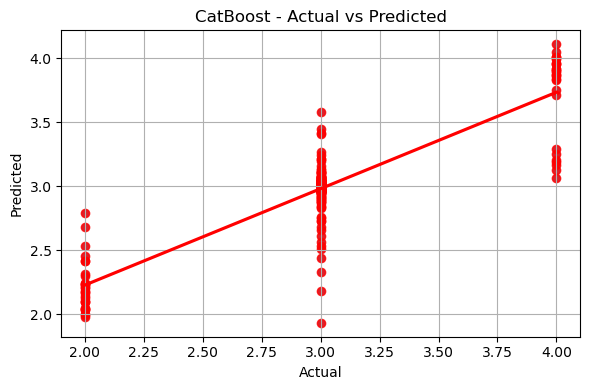

      Actual  Predicted      Diff
1178       3   2.906229  0.093771
865        2   2.124054 -0.124054
101        3   3.015829 -0.015829
439        3   2.982860  0.017140
58         3   3.009173 -0.009173

Random Forest R2 Score: 73.06%


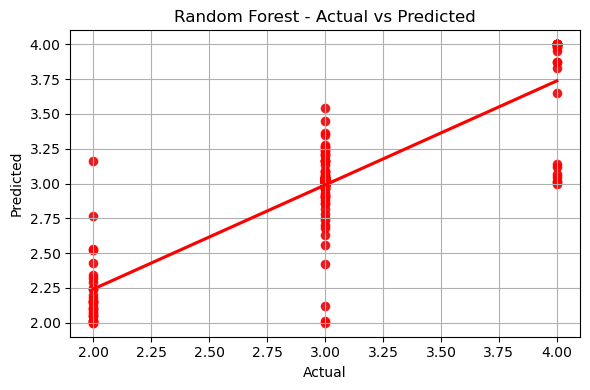

      Actual  Predicted  Diff
1178       3       2.56  0.44
865        2       2.06 -0.06
101        3       3.00  0.00
439        3       3.00  0.00
58         3       3.00  0.00

XGBoost R2 Score: 70.65%


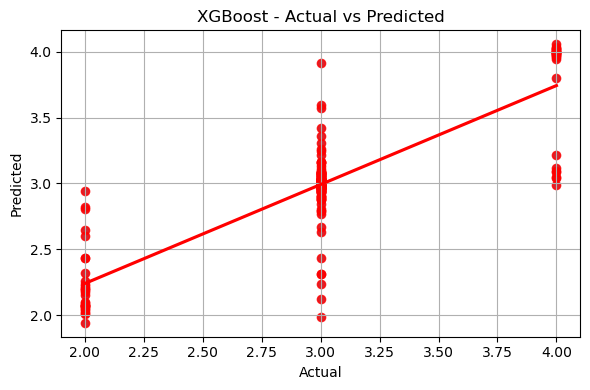

      Actual  Predicted      Diff
1178       3   2.945254  0.054746
865        2   2.094807 -0.094807
101        3   2.986702  0.013298
439        3   2.984195  0.015805
58         3   2.996080  0.003920


In [16]:
top_models = {
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Train and visualize each
for name, model in top_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    print(f"\n{name} R2 Score: {r2*100:.2f}%")

    # Prediction vs Actual plot
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    sns.regplot(x=y_test, y=y_pred, ci=None, color='red')
    plt.title(f"{name} - Actual vs Predicted")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Show first few predictions
    pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Diff': y_test - y_pred})
    print(pred_df.head())

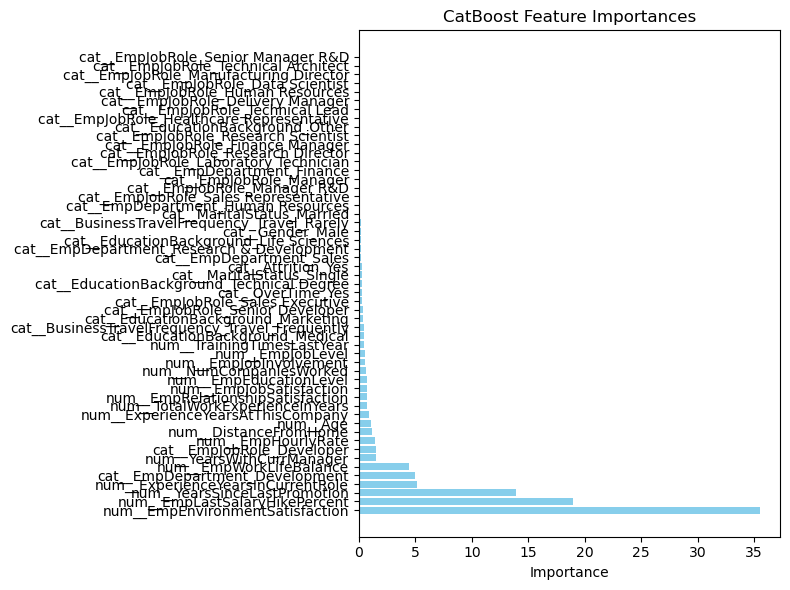

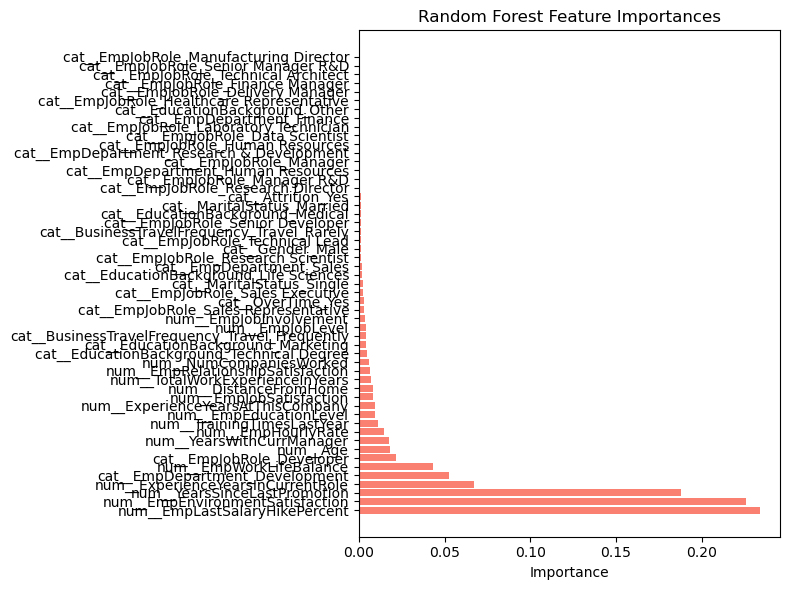

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature names from ColumnTransformer (example)
feature_names = preprocessor.get_feature_names_out()  # e.g. ['Age', 'Dept_HR', 'Dept_IT', ...]

# CatBoost feature importances
catboost_model = top_models["CatBoost"]  # Retrieve the CatBoost model
cat_importances = catboost_model.get_feature_importance()  # yields array of length n_features
# Sort by importance
cat_idx = np.argsort(cat_importances)[::-1]
plt.figure(figsize=(8,6))
plt.barh(feature_names[cat_idx], cat_importances[cat_idx], color='skyblue')
plt.title("CatBoost Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# RandomForest feature importances
rf_model = top_models["Random Forest"]  # Retrieve the Random Forest model
rf_importances = rf_model.feature_importances_  # Get feature importances from the fitted RF model
rf_idx = np.argsort(rf_importances)[::-1]
plt.figure(figsize=(8,6))
plt.barh(feature_names[rf_idx], rf_importances[rf_idx], color='salmon')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


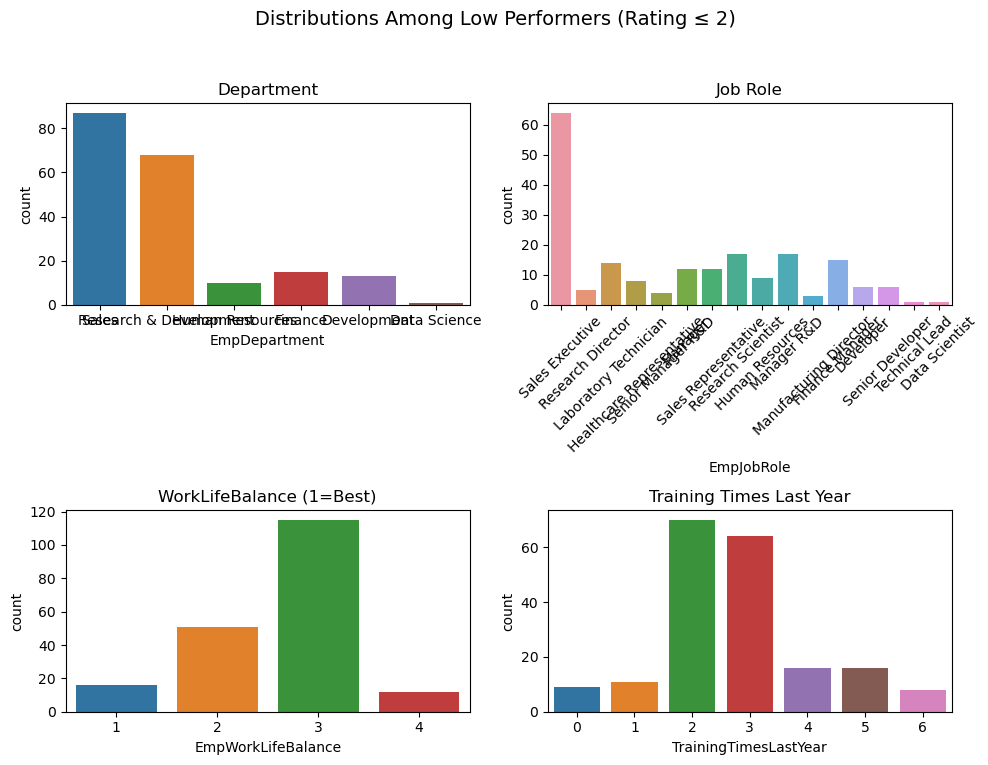

In [21]:
import seaborn as sns

# Filter low performers
low_perf = df[df["PerformanceRating"] <= 2].copy()

# Set up a grid of plots
fig, axes = plt.subplots(2, 2, figsize=(10,8))
fig.suptitle("Distributions Among Low Performers (Rating ≤ 2)", fontsize=14)

sns.countplot(ax=axes[0,0], x="EmpDepartment", data=low_perf)
axes[0,0].set_title("Department")

sns.countplot(ax=axes[0,1], x="EmpJobRole", data=low_perf)
axes[0,1].set_title("Job Role")
axes[0,1].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[1,0], x="EmpWorkLifeBalance", data=low_perf)
axes[1,0].set_title("WorkLifeBalance (1=Best)")

sns.countplot(ax=axes[1,1], x="TrainingTimesLastYear", data=low_perf)
axes[1,1].set_title("Training Times Last Year")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


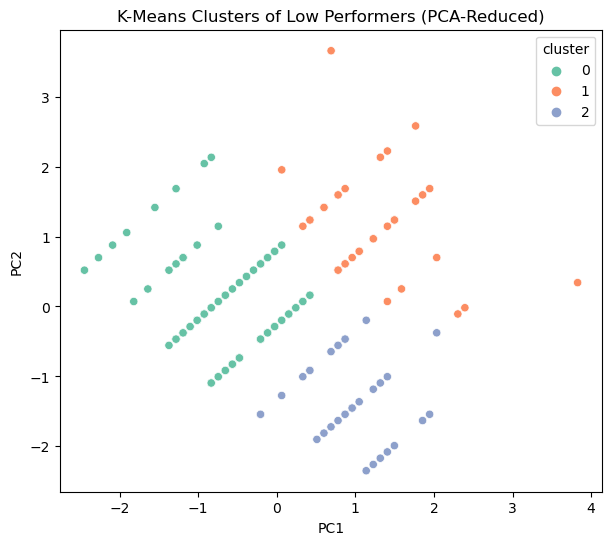

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select numeric features for clustering
num_features = ["TotalWorkExperienceInYears", "TrainingTimesLastYear"]
X_low = low_perf[num_features].dropna()

# Scale features
scaler = StandardScaler()
X_low_scaled = scaler.fit_transform(X_low)

# KMeans clustering (e.g., k=3 clusters)
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto').fit(X_low_scaled)
labels = kmeans.labels_  # cluster labels for each sample:contentReference[oaicite:7]{index=7}

# Add cluster labels back to low_perf DataFrame
low_perf = low_perf.loc[X_low.index].copy()
low_perf["cluster"] = labels

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_low_scaled)
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["cluster"] = labels

# Scatter plot of PCA-reduced data colored by cluster
plt.figure(figsize=(7,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="cluster", palette="Set2")
plt.title("K-Means Clusters of Low Performers (PCA-Reduced)")
plt.show()


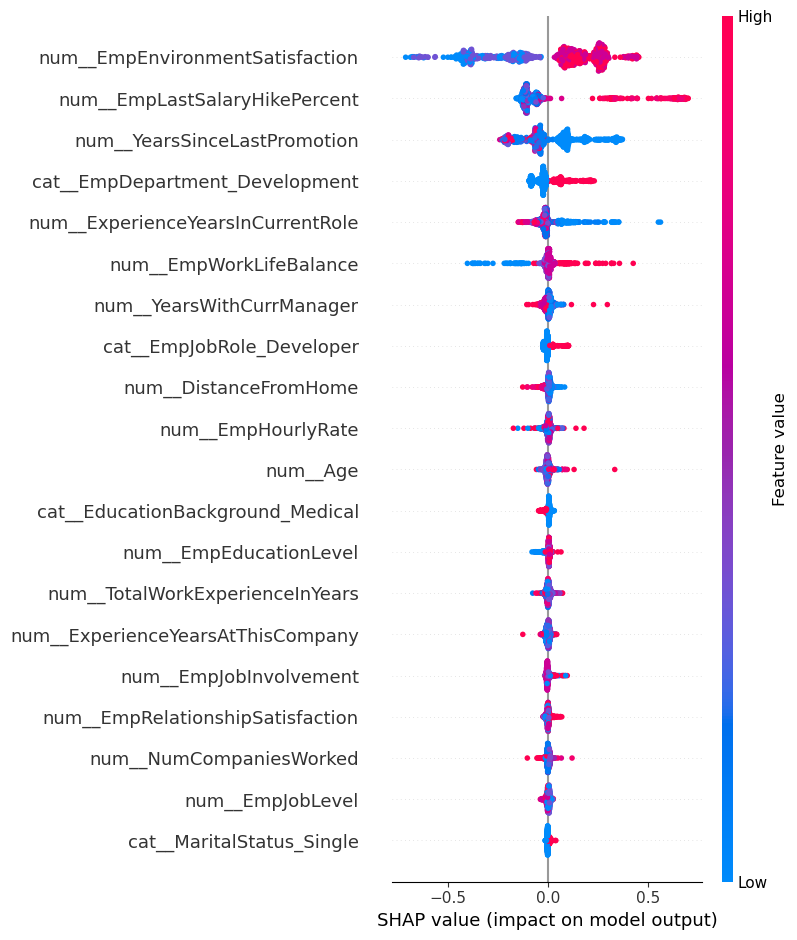

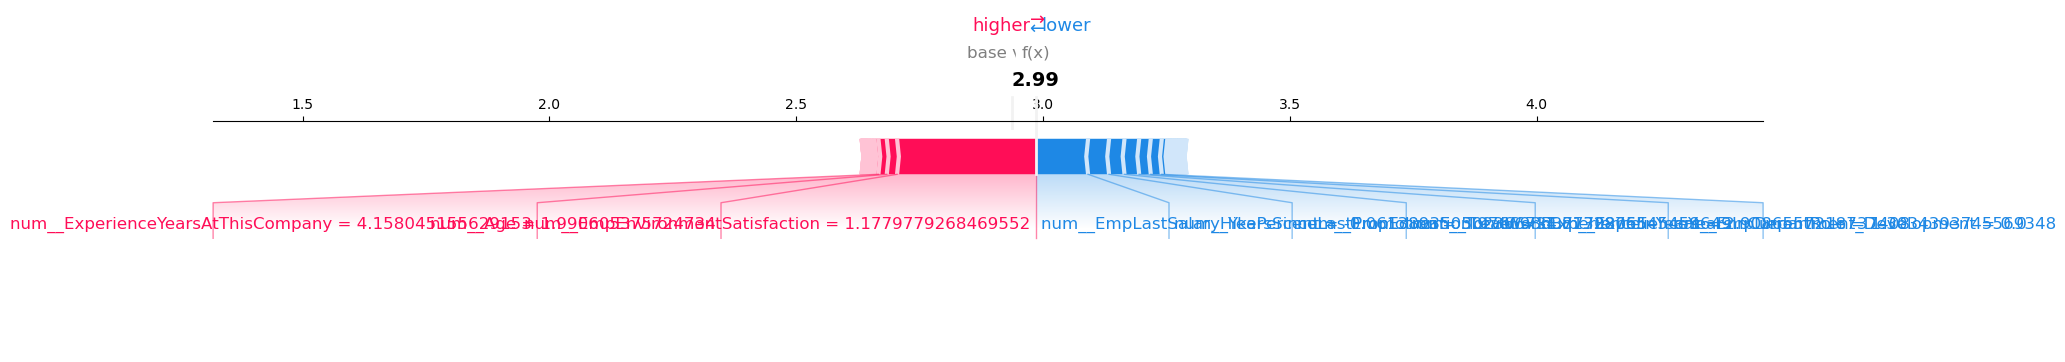

In [27]:
import shap

# Use TreeExplainer for CatBoost model
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X_train)  # use your training or test features

# Global summary plot (beeswarm) of feature importances
shap.summary_plot(shap_values, X_train, feature_names=feature_names)

# Pick one low-performing example from the test set
idx = low_perf.index[0]  # for example, first low performer
# Convert X_test back to a DataFrame for compatibility with .loc
X_test_df = pd.DataFrame(X_test, columns=feature_names)
X_instance = X_test_df.loc[idx]  # corresponding feature vector

# Compute SHAP values for this instance
shap_values_instance = explainer.shap_values(X_instance.values.reshape(1, -1))

# Local force plot
shap.initjs()  # initialize JavaScript visualization (if in Jupyter)
shap.force_plot(explainer.expected_value, shap_values_instance, X_instance, feature_names=feature_names, matplotlib=True)


In [34]:
print(df.columns.tolist())


['Age', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition', 'PerformanceRating', 'LowPerformer']


In [35]:
columns_of_interest = [
    'EmpDepartment', 'EmpJobRole', 'EmpWorkLifeBalance',
    'TrainingTimesLastYear', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany'
]

# Filter and display
low_perf_insights = df[df['PerformanceRating'] <= 2][columns_of_interest]
print(low_perf_insights.head(10))


              EmpDepartment                 EmpJobRole  EmpWorkLifeBalance  \
132                   Sales            Sales Executive                   1   
162  Research & Development          Research Director                   2   
164  Research & Development      Laboratory Technician                   2   
165  Research & Development  Healthcare Representative                   3   
169  Research & Development         Senior Manager R&D                   3   
170  Research & Development      Laboratory Technician                   2   
175  Research & Development          Research Director                   3   
177                   Sales            Sales Executive                   3   
178                   Sales                    Manager                   3   
182                   Sales       Sales Representative                   2   

     TrainingTimesLastYear  TotalWorkExperienceInYears  \
132                      2                          17   
162                      

In [36]:
low_perf_insights.groupby('EmpDepartment').size().sort_values(ascending=False)


EmpDepartment
Sales                     87
Research & Development    68
Finance                   15
Development               13
Human Resources           10
Data Science               1
dtype: int64